# Corpus analysis

This notebook is used to gain information about the corpus.

## Word clouds

The following section creates word clouds for each book

In [1]:
# Run this once
import sys
import os
from difflib import SequenceMatcher

sys.path.append('/app/src/data_access')
os.chdir('..')

from corpus_visualization import GroupedColorFunc, WordCloudGenerator
%load_ext autoreload

In [2]:
%autoreload 2

generator = WordCloudGenerator()
generator.extract_data(os.path.abspath('data/annotations/'))

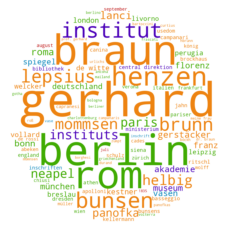

In [11]:
file_path='resources/corpus_analysis/total.png'

generator.generate_total(file_path=file_path)

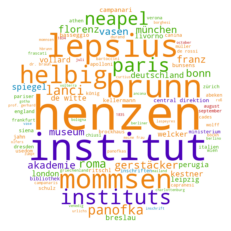

In [12]:
exclude_entities=['gerhard', 'rom', 'berlin', 'braun', 'bunsen']
    
file_path='resources/corpus_analysis/excluded_entities.png'

generator.generate_total(
    file_path=file_path,
    exclude_entities=exclude_entities)

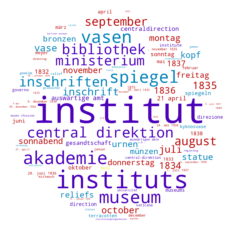

In [13]:
exclude_entity_types=['PER', 'PLACE']
    
file_path='resources/corpus_analysis/excluded_entity_types.png'

generator.generate_total(
    file_path=file_path,
    exclude_entity_types=exclude_entity_types)